In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("E:\\UPIfrauddetection_Project\\Fraud_Detection.csv")

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.shape

(6362620, 11)

In [5]:
data.rename(columns={'nameOrig':'customer_starting_transaction','oldbalanceOrg':'bal_before_transaction','newbalanceOrig':'bal_after_transaction','nameDest':'recipient_of_transaction','oldbalanceDest':'bal_of_recepient_before_transaction','newbalanceDest':'bal_of_receipient_after_transaction','isFraud':'fraud_transaction'},inplace= True)
data.head()

,step,type,amount,customer_starting_transaction,bal_before_transaction,bal_after_transaction,recipient_of_transaction,bal_of_recepient_before_transaction,bal_of_receipient_after_transaction,fraud_transaction,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   step                                 int64  
 1   type                                 object 
 2   amount                               float64
 3   customer_starting_transaction        object 
 4   bal_before_transaction               float64
 5   bal_after_transaction                float64
 6   recipient_of_transaction             object 
 7   bal_of_recepient_before_transaction  float64
 8   bal_of_receipient_after_transaction  float64
 9   fraud_transaction                    int64  
 10  isFlaggedFraud                       int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
data.select_dtypes(include = 'object').columns

Index(['type', 'customer_starting_transaction', 'recipient_of_transaction'], dtype='object')

In [8]:
data.select_dtypes(include = ['int64','float64']).columns

Index(['step', 'amount', 'bal_before_transaction', 'bal_after_transaction',
       'bal_of_recepient_before_transaction',
       'bal_of_receipient_after_transaction', 'fraud_transaction',
       'isFlaggedFraud'],
      dtype='object')

In [9]:
data.isnull().sum()

step                                        0
type                                   203603
amount                                      0
customer_starting_transaction          203603
bal_before_transaction                      0
bal_after_transaction                  267230
recipient_of_transaction                    0
bal_of_recepient_before_transaction    203603
bal_of_receipient_after_transaction         0
fraud_transaction                           0
isFlaggedFraud                              0
dtype: int64

In [10]:
# Impute missing values for numerical columns with their mean
numerical_features = ['bal_after_transaction', 'bal_of_recepient_before_transaction']
data[numerical_features] = data[numerical_features].fillna(data[numerical_features].median())


In [11]:
# Impute missing values for categorical columns with their mode (most frequent value)
categorical_features = ['type', 'customer_starting_transaction']

for col in categorical_features:
    data[col] = data[col].fillna(data[col].mode()[0])

In [12]:
data.isnull().sum()

step                                   0
type                                   0
amount                                 0
customer_starting_transaction          0
bal_before_transaction                 0
bal_after_transaction                  0
recipient_of_transaction               0
bal_of_recepient_before_transaction    0
bal_of_receipient_after_transaction    0
fraud_transaction                      0
isFlaggedFraud                         0
dtype: int64

In [13]:
data.head()

,step,type,amount,customer_starting_transaction,bal_before_transaction,bal_after_transaction,recipient_of_transaction,bal_of_recepient_before_transaction,bal_of_receipient_after_transaction,fraud_transaction,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [14]:
data.step.value_counts()

19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: step, Length: 743, dtype: int64

In [15]:
data["type"].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [16]:
data_cat = pd.get_dummies(data['type'], dtype=int)

In [17]:
data_cat.head(10)

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0
5,0,0,0,1,0
6,0,0,0,1,0
7,0,0,0,1,0
8,0,0,0,1,0
9,0,0,1,0,0


In [18]:
data = pd.concat([data, data_cat], axis = 1)
data.drop(['type'], axis=1, inplace=True)
data.head()

,step,amount,customer_starting_transaction,bal_before_transaction,bal_after_transaction,recipient_of_transaction,bal_of_recepient_before_transaction,bal_of_receipient_after_transaction,fraud_transaction,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,0,1,0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,0,1
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0,1,0,0,0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,0,1,0


In [19]:
data.drop(['customer_starting_transaction','recipient_of_transaction'],axis=1,inplace=True)

In [20]:
data.head()

,step,amount,bal_before_transaction,bal_after_transaction,bal_of_recepient_before_transaction,bal_of_receipient_after_transaction,fraud_transaction,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,0,1,0


EDA

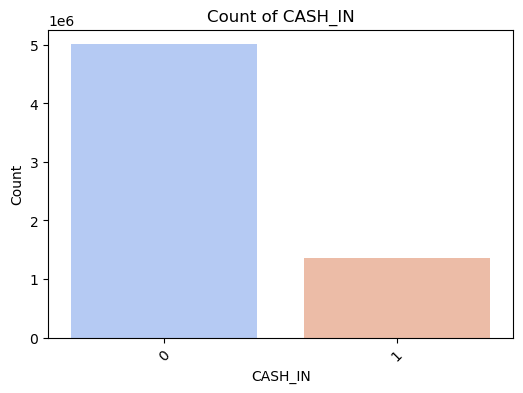

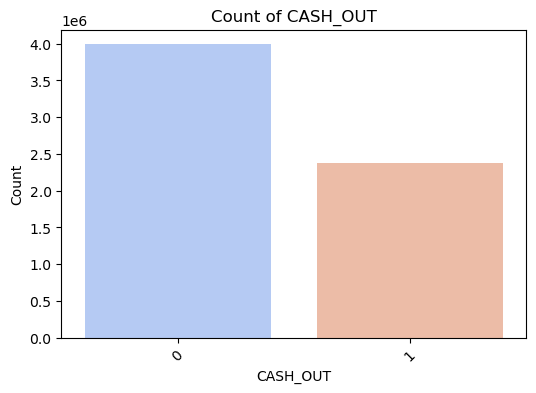

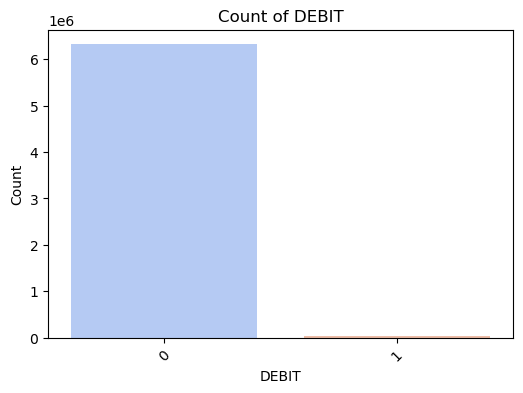

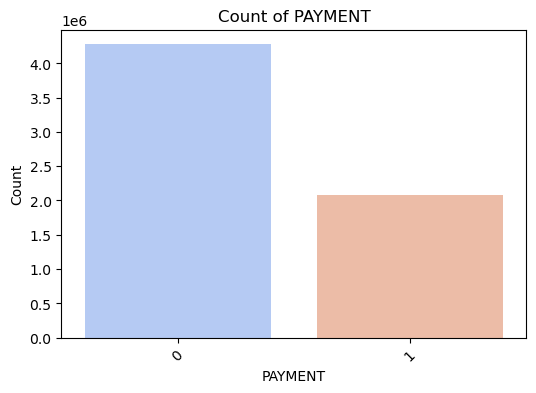

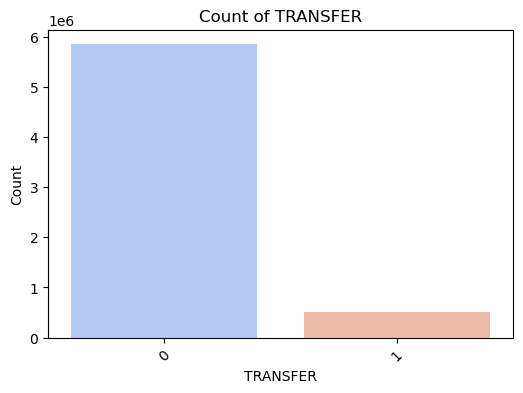

In [21]:
categorical_columns = ['CASH_IN','CASH_OUT','DEBIT','PAYMENT','TRANSFER']  # Replace with actual column names

for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=data, palette="coolwarm")
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate labels if needed
    plt.show()


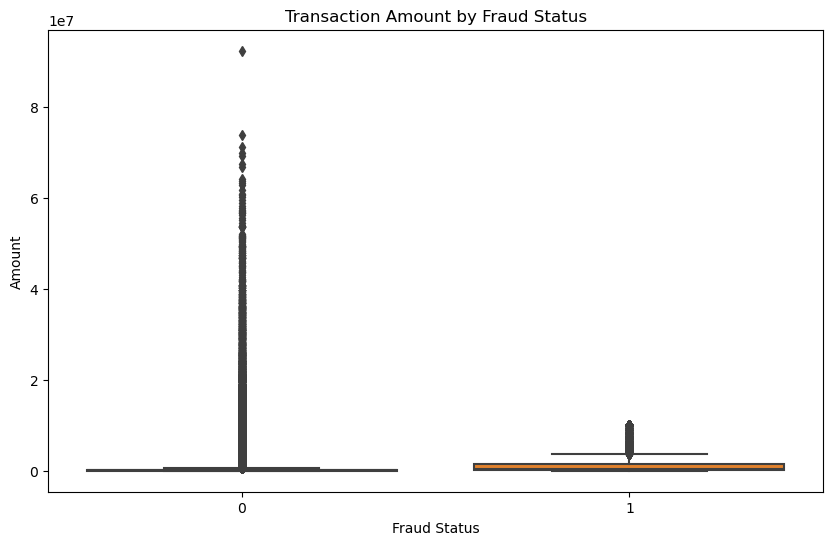

In [22]:
# Boxplot of transaction amount by fraud status
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud_transaction', y='amount', data=data)
plt.title('Transaction Amount by Fraud Status')
plt.xlabel('Fraud Status')
plt.ylabel('Amount')
plt.show()

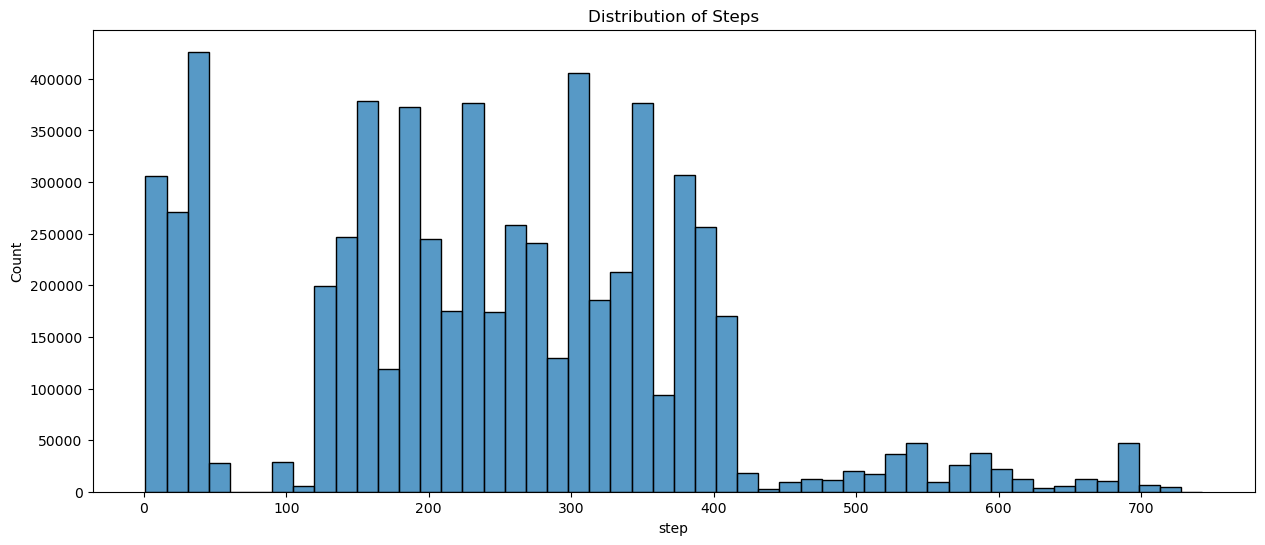

In [23]:
plt.figure(figsize=(15, 6))
sns.histplot(data['step'], bins=50)
plt.title('Distribution of Steps')
plt.show()

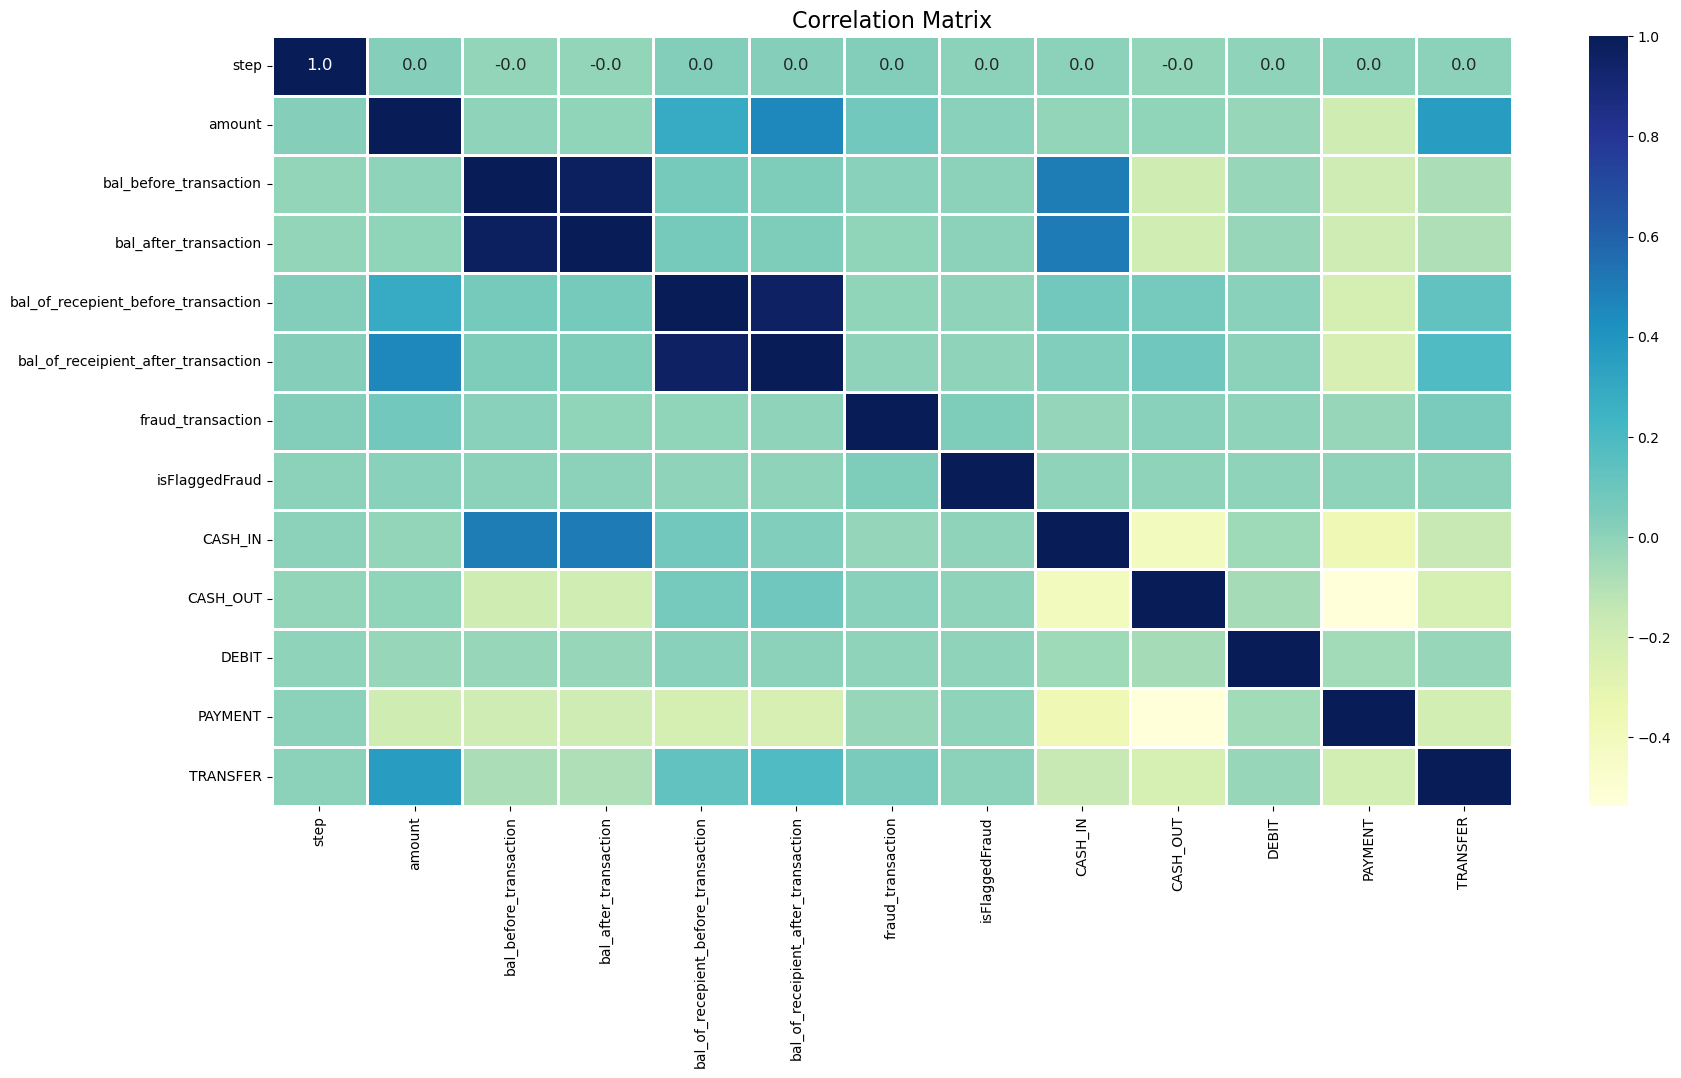

In [24]:
plt.figure(figsize=(20, 10))
numeric_cols = data.select_dtypes(include=[np.number]).columns
sns.heatmap(data[numeric_cols].corr(), cmap='YlGnBu', fmt='.1f', linewidths=1, annot=True, annot_kws={"size": 12})
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [25]:
data.corr()

,step,amount,bal_before_transaction,bal_after_transaction,bal_of_recepient_before_transaction,bal_of_receipient_after_transaction,fraud_transaction,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
step,1.000000,0.022373,-0.010058,-0.010024,0.027308,0.025888,0.031578,0.003277,0.004224,-0.012637,0.002895,0.004865,0.006844
amount,0.022373,1.000000,-0.002762,-0.007574,0.288431,0.459304,0.076688,0.012295,-0.009414,-0.004124,-0.023005,-0.192686,0.359397
bal_before_transaction,-0.010058,-0.002762,1.000000,0.975667,0.065065,0.042029,0.010154,0.003835,0.496524,-0.192245,-0.021109,-0.184923,-0.080173
bal_after_transaction,-0.010024,-0.007574,0.975667,1.000000,0.065105,0.040912,-0.007875,0.003872,0.504816,-0.197227,-0.021026,-0.184907,-0.083838
bal_of_recepient_before_transaction,0.027308,0.288431,0.065065,0.065105,1.000000,0.961936,-0.005722,-0.000505,0.080250,0.071389,0.009967,-0.222336,0.132548
bal_of_receipient_after_transaction,0.025888,0.459304,0.042029,0.040912,0.961936,1.000000,0.000535,-0.000529,0.034313,0.089316,0.006182,-0.232573,0.188397
fraud_transaction,0.031578,0.076688,0.010154,-0.007875,-0.005722,0.000535,1.000000,0.044109,-0.018699,0.011078,-0.002864,-0.025078,0.052374
isFlaggedFraud,0.003277,0.012295,0.003835,0.003872,-0.000505,-0.000529,0.044109,1.000000,-0.000825,-0.001222,-0.000126,-0.001106,0.005340
CASH_IN,0.004224,-0.009414,0.496524,0.504816,0.080250,0.034313,-0.018699,-0.000825,1.000000,-0.400654,-0.041433,-0.362811,-0.154465
CASH_OUT,-0.012637,-0.004124,-0.192245,-0.197227,0.071389,0.089316,0.011078,-0.001222,-0.400654,1.000000,-0.061364,-0.537338,-0.228769


splitting data into test set and training set

In [26]:
# Split dataset
train_data = data.iloc[:4000000]  # First 4M rows for training
val_data = data.iloc[4000000:5000000]  # Next 1M for validation
test_data = data.iloc[5000000:6000000]  # Last 1M for live evaluation

In [27]:
# Validation set
x_train = val_data.drop(columns=['fraud_transaction'])
y_train= val_data['fraud_transaction']
x_test = test_data.drop(columns=['fraud_transaction'])  
y_test = test_data['fraud_transaction']

In [28]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(random_state=42)
x_resampled, y_resampled = undersample.fit_resample(x_train, y_train)

In [29]:
x_train=x_resampled
y_train=y_resampled

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Training And Evaluating Model

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [32]:
def train_test_model(model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    score=accuracy_score(y_test,y_pred)
    print(f'accuracy score of {model} is :{score}')
    print(f'{classification_report(y_test,y_pred)}')
    mx=confusion_matrix(y_test,y_pred)
    sns.heatmap(mx,annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier 
import xgboost as xg
from sklearn.svm import SVC

In [34]:
import warnings
warnings.filterwarnings("ignore")

Logistic Regression

accuracy score of LogisticRegression(class_weight='balanced', random_state=42) is :0.599675
              precision    recall  f1-score   support

           0       1.00      0.60      0.75    999120
           1       0.00      0.97      0.00       880

    accuracy                           0.60   1000000
   macro avg       0.50      0.79      0.38   1000000
weighted avg       1.00      0.60      0.75   1000000



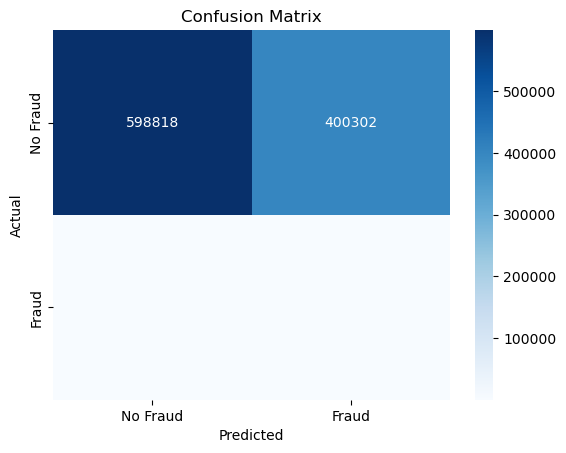

In [35]:
train_test_model(LogisticRegression(class_weight='balanced', random_state=42))

Decision Tree

accuracy score of DecisionTreeClassifier(class_weight='balanced', max_depth=20, random_state=42) is :0.975329
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    999120
           1       0.03      0.96      0.06       880

    accuracy                           0.98   1000000
   macro avg       0.52      0.97      0.53   1000000
weighted avg       1.00      0.98      0.99   1000000



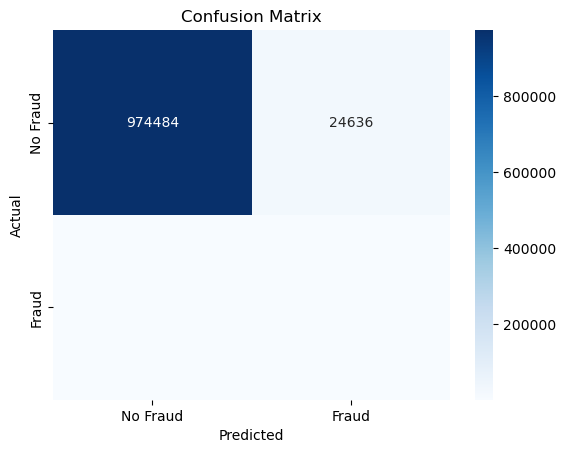

In [36]:
train_test_model(DecisionTreeClassifier(max_depth=20,class_weight='balanced', random_state=42))

Random Forest

accuracy score of RandomForestClassifier() is :0.97247
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    999120
           1       0.03      0.99      0.06       880

    accuracy                           0.97   1000000
   macro avg       0.52      0.98      0.52   1000000
weighted avg       1.00      0.97      0.99   1000000



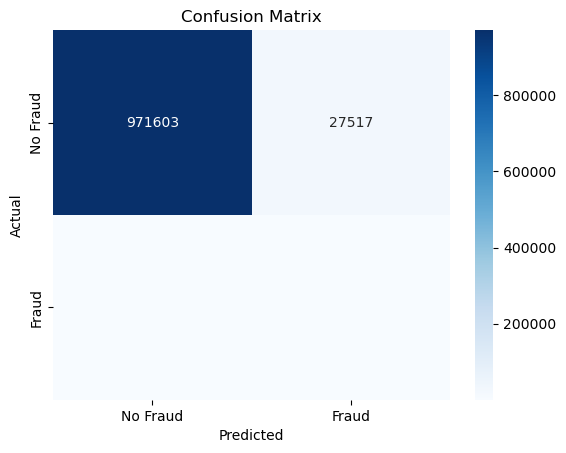

In [37]:
train_test_model(RandomForestClassifier())

Gradient Boosting

XG boost

accuracy score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) is :0.969856
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    999120
           1       0.03      0.99      0.05       880

    accuracy                           0.97   100000

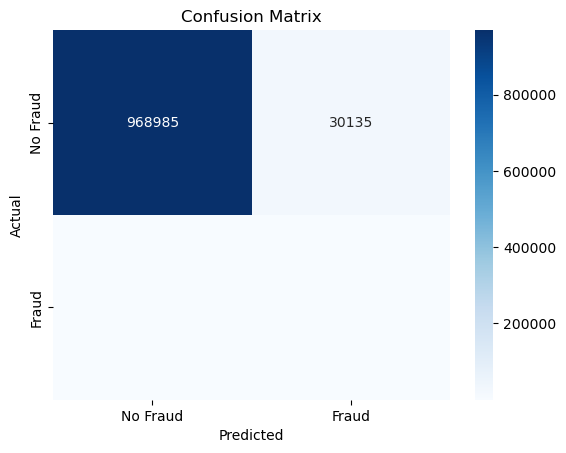

In [40]:
train_test_model(xg.XGBClassifier(learning_rate= 0.2, max_depth=7, n_estimators= 150))

Support Vector Machine

accuracy score of SVC() is :0.912829
              precision    recall  f1-score   support

           0       1.00      0.91      0.95    999120
           1       0.00      0.49      0.01       880

    accuracy                           0.91   1000000
   macro avg       0.50      0.70      0.48   1000000
weighted avg       1.00      0.91      0.95   1000000



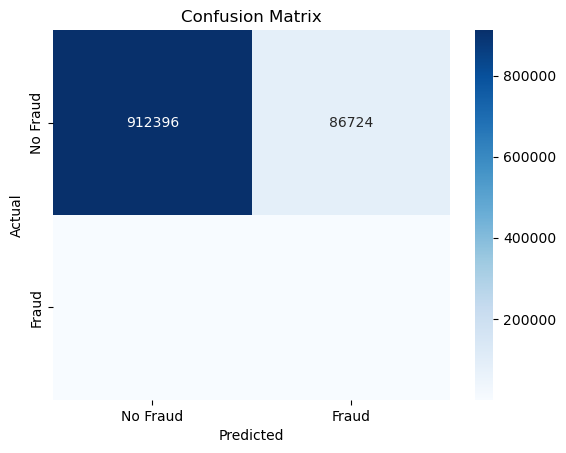

In [41]:
train_test_model(SVC())

Gradient Boosting

accuracy score of GradientBoostingClassifier(max_depth=7, n_estimators=150) is :0.976234
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    999120
           1       0.03      0.97      0.07       880

    accuracy                           0.98   1000000
   macro avg       0.52      0.97      0.53   1000000
weighted avg       1.00      0.98      0.99   1000000



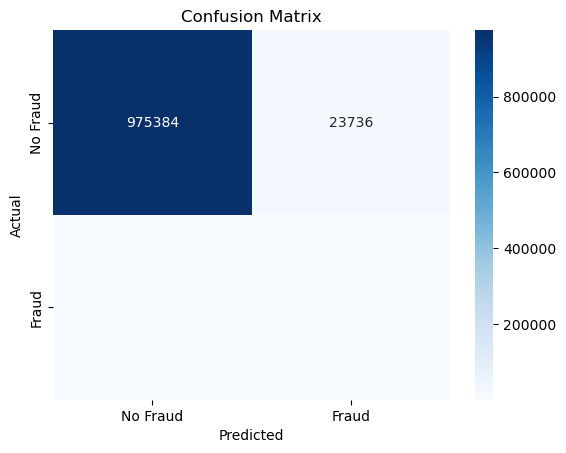

In [42]:
train_test_model(GradientBoostingClassifier(learning_rate= 0.1, max_depth=7, n_estimators= 150))

In [43]:
model = GradientBoostingClassifier()
model.fit(x_train, y_train)

GradientBoostingClassifier()

In [44]:
import pickle as pkl

In [45]:
pkl.dump(model,open('UPIFraud.pkl','wb'))

In [46]:
pkl.dump(sc,open('scaler.pkl','wb'))

Best Model for the undersample Model Gradient boosting has produced the best result with accuracy score of 0.991

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score

# Define model and hyperparameter grid
models = {"Gradient Boosting": GradientBoostingClassifier(random_state=42)}
param_grid = {
    "Gradient Boosting": {"n_estimators": [100, 200], "learning_rate": [0.01, 0.1]}
}

# Perform hyperparameter tuning
grid_search = GridSearchCV(models["Gradient Boosting"], param_grid["Gradient Boosting"], cv=3, scoring='roc_auc', n_jobs=-1)
grid_search.fit(x_train, y_resampled)  # Ensure you're using preprocessed training data

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(x_test)
y_prob = best_model.predict_proba(x_test)[:, 1]

# Print results
print(f"Best parameters for Gradient Boosting: {grid_search.best_params_}")
print(classification_report(y_test, y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob):.4f}\n")


Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    999120
           1       0.02      1.00      0.04       880

    accuracy                           0.96   1000000
   macro avg       0.51      0.98      0.51   1000000
weighted avg       1.00      0.96      0.98   1000000

ROC-AUC Score: 0.9967

